       PassengerId    Survived      Pclass         Age       SibSp  \
count   891.000000  891.000000  891.000000  891.000000  891.000000   
mean    446.000000    0.383838    2.308642   29.361582    0.523008   
std     257.353842    0.486592    0.836071   13.019697    1.102743   
min       1.000000    0.000000    1.000000    0.420000    0.000000   
25%     223.500000    0.000000    2.000000   22.000000    0.000000   
50%     446.000000    0.000000    3.000000   28.000000    0.000000   
75%     668.500000    1.000000    3.000000   35.000000    1.000000   
max     891.000000    1.000000    3.000000   80.000000    8.000000   

            Parch        Fare     Sex_num  
count  891.000000  891.000000  891.000000  
mean     0.381594   32.204208    0.352413  
std      0.806057   49.693429    0.477990  
min      0.000000    0.000000    0.000000  
25%      0.000000    7.910400    0.000000  
50%      0.000000   14.454200    0.000000  
75%      0.000000   31.000000    1.000000  
max      6.000000

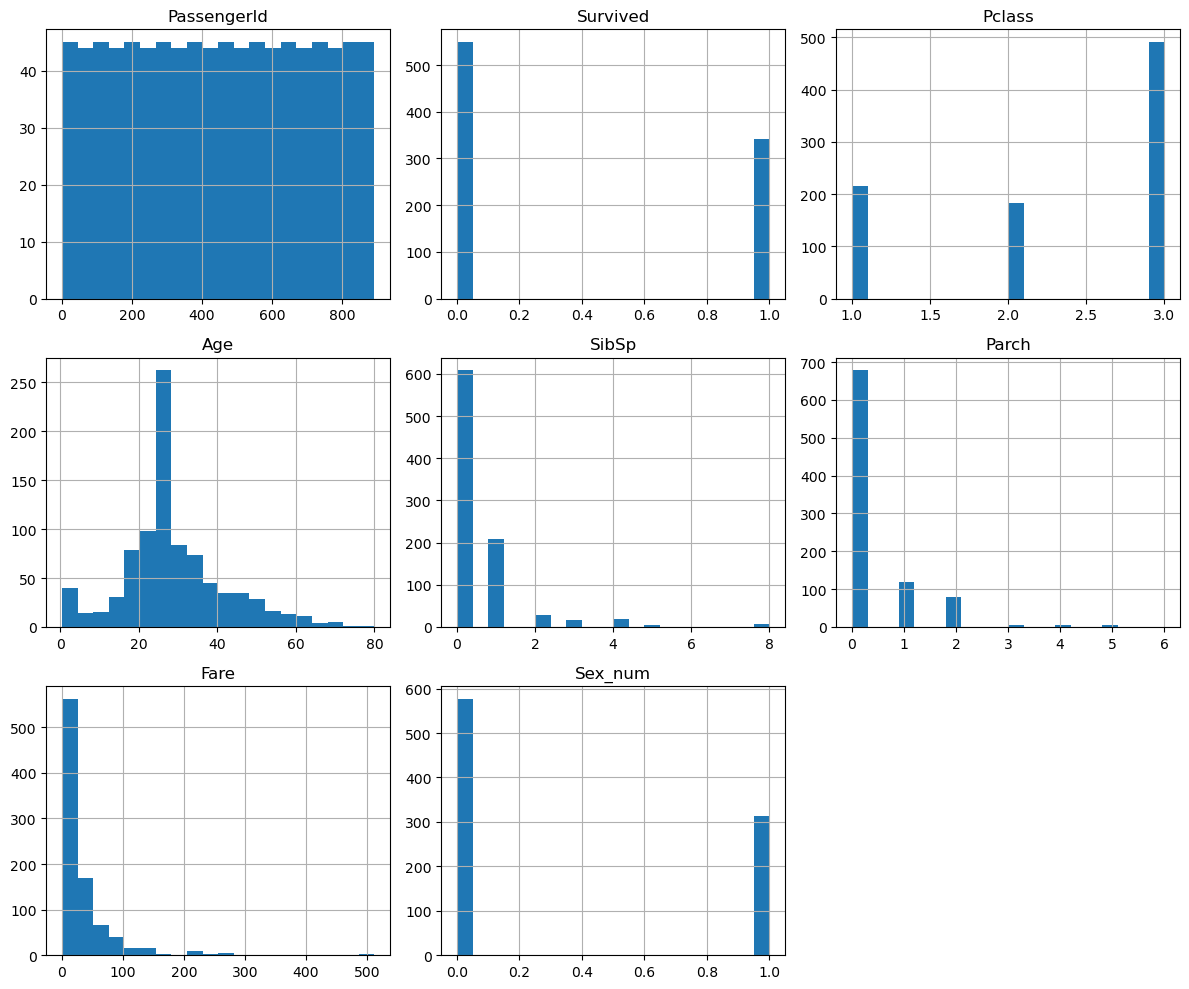

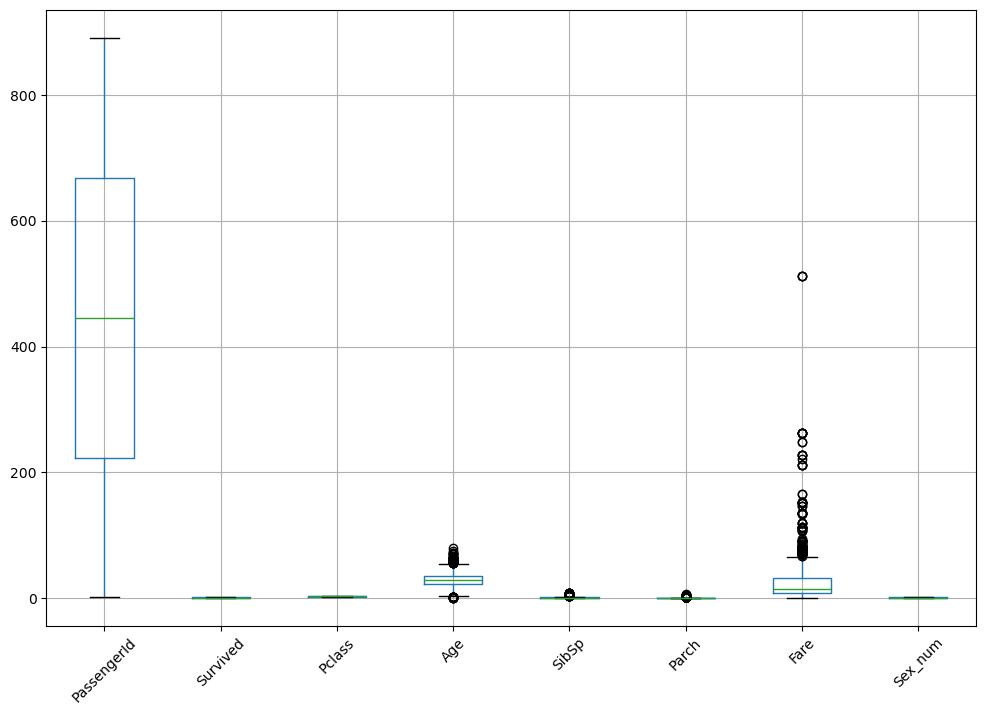

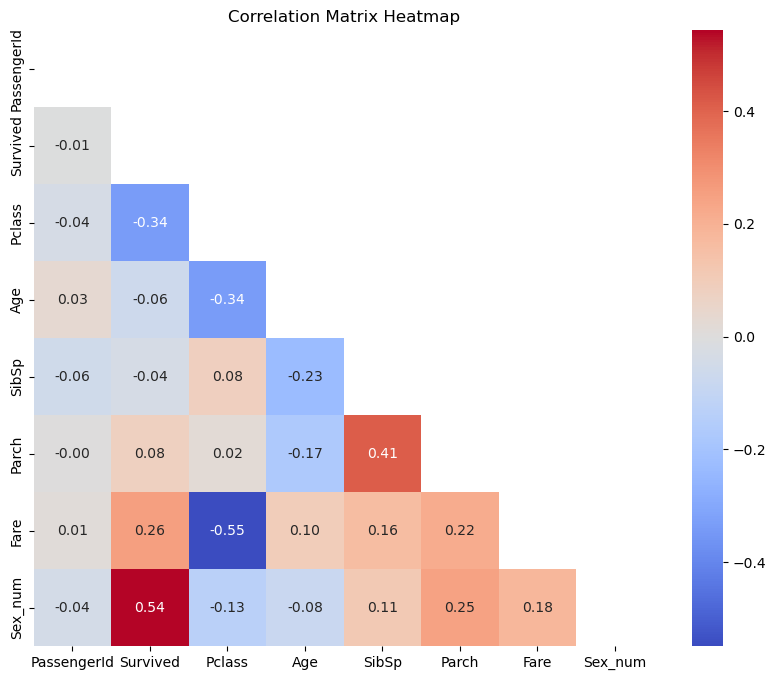

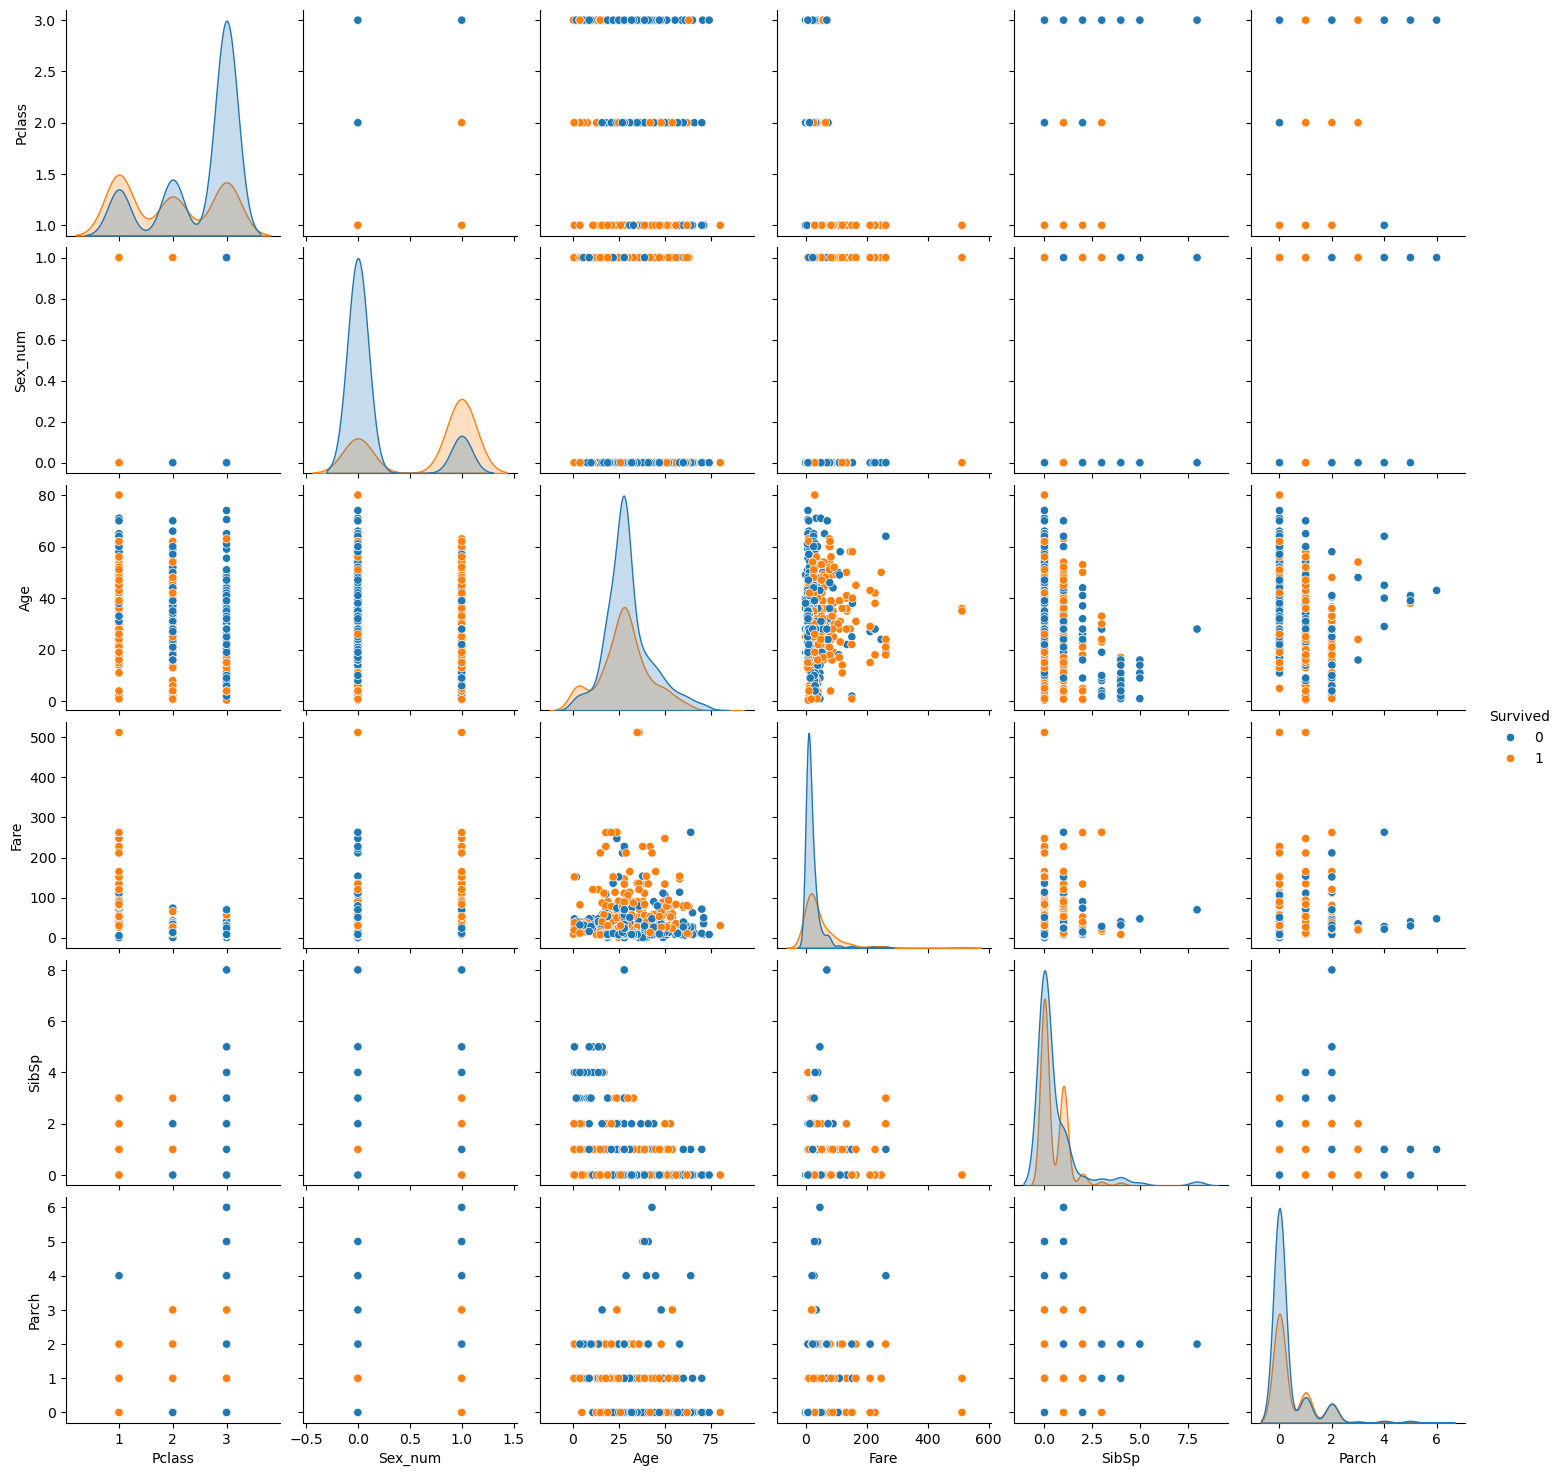

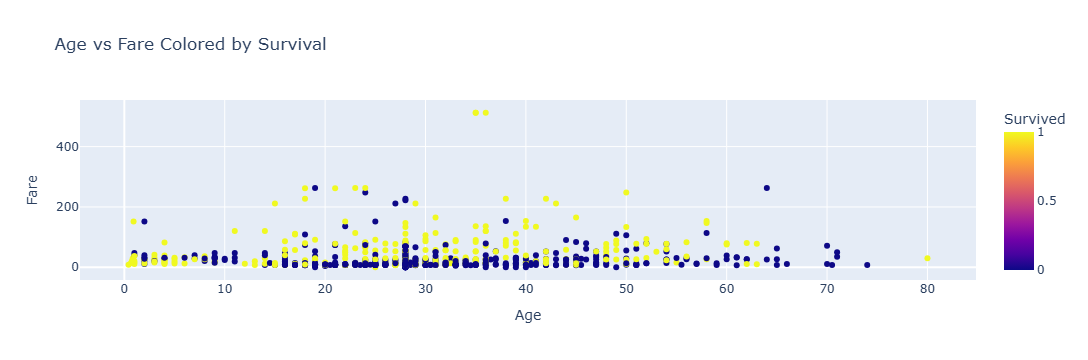

In [4]:
# Import libraries
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
import numpy as np

# Load dataset
df = pd.read_csv("Titanic-Dataset.csv")

# Handle missing values
df['Age'] = df['Age'].fillna(df['Age'].median())
df['Fare'] = df['Fare'].fillna(df['Fare'].median())

# Encode 'Sex' for numerical plots
df['Sex_num'] = df['Sex'].map({'male': 0, 'female': 1})

# 1. Summary Statistics
summary = df.describe()
print(summary)

# 2. Histograms and Boxplots
df.select_dtypes(include='number').hist(figsize=(12, 10), bins=20)
plt.tight_layout()
plt.show()

df.select_dtypes(include='number').boxplot(figsize=(12, 8))
plt.xticks(rotation=45)
plt.show()

# 3. Correlation Matrix and Heatmap
corr_matrix = df.select_dtypes(include='number').corr()

plt.figure(figsize=(10,8))
mask = np.triu(np.ones_like(corr_matrix, dtype=bool))  # Mask the upper triangle
sns.heatmap(corr_matrix, mask=mask, annot=True, cmap="coolwarm", fmt=".2f")
plt.title('Correlation Matrix Heatmap')
plt.show()

# 4. Pairplot for feature relationships
sns.pairplot(df[['Survived', 'Pclass', 'Sex_num', 'Age', 'Fare', 'SibSp', 'Parch']], hue='Survived')
plt.show()

# 5. Interactive Visualization (optional, using Plotly)
fig = px.scatter(df, x="Age", y="Fare", color="Survived", title="Age vs Fare Colored by Survival")
fig.show()
